# MO-GAAL - Multi-Objective Generative Adversarial Active Learning
### MO_GAAL directly generates informative potential outliers to assist the classifier in describing a boundary that can separate outliers from normal data effectively. Moreover, to prevent the generator from falling into the mode collapsing problem, the network structure of SO-GAAL is expanded from a single generator (SO-GAAL) to multiple generators with different objectives (MO-GAAL) to generate a reasonable reference distribution for the whole dataset.
Source: https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.mo_gaal

### Arguments that work with MO-GAAL algorithm:
1. stop_epochs
2. lr_d
3. lr_g
4. decay
5. momentum
6. contamination

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import sys
import time
sys.path.insert(0,'../../../..')
import omama as O

Populating the interactive namespace from numpy and matplotlib


In [2]:
imgs = O.DataHelper.get2D(N = 100, config_num=5, randomize=True, timing=True)
histograms = O.Features.get_features(imgs, feature_type="hist", norm_type="minmax")

get2D                    ...took   249.857839 seconds


2022-09-01 21:03:31.874293: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-09-01 21:03:39.318465: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-09-01 21:03:39.771156: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:0f:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2022-09-01 21:03:39.771275: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-09-01 21:03:39.791916: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-09-01 21:03:39.791967: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.1

Epoch 1 of 60

Testing for epoch 1 index 1:


2022-09-01 21:03:48.854191: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-09-01 21:03:48.883934: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245770000 Hz
2022-09-01 21:03:49.261257: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-09-01 21:03:54.000650: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2022-09-01 21:03:54.000996: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


2022-09-01 21:03:57.943831: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:00.555835: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:01.679905: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled


2022-09-01 21:04:05.155844: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:07.488171: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:08.660548: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:09.855833: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 2 of 60

Testing for epoch 2 index 1:


2022-09-01 21:04:11.784373: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:11.997365: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:12.018096: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:12.044267: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:12.060343: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:12.084067: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:12.100379: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation

Epoch 3 of 60

Testing for epoch 3 index 1:


2022-09-01 21:04:14.139814: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:14.393655: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:14.412085: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:14.443957: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:14.450201: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:14.476081: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:14.492336: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation

Epoch 4 of 60

Testing for epoch 4 index 1:


2022-09-01 21:04:16.444642: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:16.684070: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:16.704036: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:16.727912: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:16.747986: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:16.780056: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:16.797419: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation

Epoch 5 of 60

Testing for epoch 5 index 1:


2022-09-01 21:04:18.826425: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:19.064603: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:19.085822: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:19.110531: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:19.130773: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:19.151593: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:19.171842: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation

Epoch 6 of 60

Testing for epoch 6 index 1:


2022-09-01 21:04:21.164462: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:21.384175: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:21.392309: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:21.416320: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:21.444376: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:21.480140: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:21.506107: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation

Epoch 7 of 60

Testing for epoch 7 index 1:


2022-09-01 21:04:23.532018: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:23.768355: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:23.789157: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:23.807977: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:23.836011: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:23.859830: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:23.872352: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation

Epoch 8 of 60

Testing for epoch 8 index 1:


2022-09-01 21:04:25.839928: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:26.053409: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:26.095794: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:26.123807: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:26.136018: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:26.152578: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:26.175922: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation

Epoch 9 of 60

Testing for epoch 9 index 1:


2022-09-01 21:04:28.039798: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:28.219835: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:28.231805: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:28.255832: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:28.283834: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:28.303813: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:28.309000: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation

Epoch 10 of 60

Testing for epoch 10 index 1:


2022-09-01 21:04:29.852215: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:30.047802: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:30.067812: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:30.079806: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:30.099830: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:30.109137: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:30.131829: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation

Epoch 11 of 60

Testing for epoch 11 index 1:


2022-09-01 21:04:31.791865: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:31.971796: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:31.999804: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:32.011797: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:32.035848: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:32.055798: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:32.060736: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation

Epoch 12 of 60

Testing for epoch 12 index 1:


2022-09-01 21:04:33.700114: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:33.875516: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:33.890743: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:33.912848: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:33.927799: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:33.955839: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:33.968803: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation

Epoch 13 of 60

Testing for epoch 13 index 1:


2022-09-01 21:04:35.524253: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:35.699787: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:35.723796: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:35.739114: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:35.764103: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:35.774938: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:35.807798: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation

Epoch 14 of 60

Testing for epoch 14 index 1:


2022-09-01 21:04:37.407834: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:37.579792: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:37.610653: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:37.620468: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:37.643829: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:37.663824: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:37.669202: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation

Epoch 15 of 60

Testing for epoch 15 index 1:


2022-09-01 21:04:39.295810: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:39.463798: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:39.483810: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:39.495802: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:39.515805: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:39.535844: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:39.547786: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation

Epoch 16 of 60

Testing for epoch 16 index 1:


2022-09-01 21:04:41.183830: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:41.352102: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:41.378467: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:41.391795: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:41.419835: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:41.426482: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:41.455831: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation

Epoch 17 of 60

Testing for epoch 17 index 1:


2022-09-01 21:04:43.111820: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:43.291800: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:43.311790: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:43.317936: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:43.333022: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:43.359885: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:43.371849: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation

Epoch 18 of 60

Testing for epoch 18 index 1:


2022-09-01 21:04:45.635802: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:45.827815: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:45.835820: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:45.851793: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:45.879838: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:45.885145: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:45.919828: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation

Epoch 19 of 60

Testing for epoch 19 index 1:


2022-09-01 21:04:47.511857: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:47.707824: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:47.719797: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:47.729907: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:47.755802: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:47.767797: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:47.783785: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation

Epoch 20 of 60

Testing for epoch 20 index 1:


2022-09-01 21:04:49.394948: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:49.579828: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:49.597761: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:49.619835: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:49.640090: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:49.659908: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:49.675788: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation

Epoch 21 of 60

Testing for epoch 21 index 1:


2022-09-01 21:04:51.386094: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:51.575851: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:51.581272: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:51.603826: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:51.623840: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:51.635797: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled
2022-09-01 21:04:51.659852: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation

Epoch 22 of 60

Testing for epoch 22 index 1:


2022-09-01 21:04:53.300867: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled


4/4 [==============================] - 0s 2ms/step - loss: 0.6766
Epoch 23 of 60

Testing for epoch 23 index 1:


2022-09-01 21:04:59.943801: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled


4/4 [==============================] - 0s 2ms/step - loss: 0.6762
Epoch 24 of 60

Testing for epoch 24 index 1:


2022-09-01 21:05:03.465579: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled


4/4 [==============================] - 0s 2ms/step - loss: 0.6760
Epoch 25 of 60

Testing for epoch 25 index 1:


2022-09-01 21:05:06.875800: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled


4/4 [==============================] - 0s 2ms/step - loss: 0.6758
Epoch 26 of 60

Testing for epoch 26 index 1:


2022-09-01 21:05:10.295001: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled


4/4 [==============================] - 0s 2ms/step - loss: 0.6758
Epoch 27 of 60

Testing for epoch 27 index 1:


2022-09-01 21:05:13.788133: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled


4/4 [==============================] - 0s 2ms/step - loss: 0.6758
Epoch 28 of 60

Testing for epoch 28 index 1:


2022-09-01 21:05:17.163802: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled


4/4 [==============================] - 0s 2ms/step - loss: 0.6760
Epoch 29 of 60

Testing for epoch 29 index 1:


2022-09-01 21:05:20.579833: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled


4/4 [==============================] - 0s 2ms/step - loss: 0.6762
Epoch 30 of 60

Testing for epoch 30 index 1:


2022-09-01 21:05:24.053506: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled


4/4 [==============================] - 0s 2ms/step - loss: 0.6764
Epoch 31 of 60

Testing for epoch 31 index 1:


2022-09-01 21:05:27.431800: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled


4/4 [==============================] - 0s 2ms/step - loss: 0.6767
Epoch 32 of 60

Testing for epoch 32 index 1:


2022-09-01 21:05:30.859869: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled


4/4 [==============================] - 0s 2ms/step - loss: 0.6771
Epoch 33 of 60

Testing for epoch 33 index 1:


2022-09-01 21:05:34.358215: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled


4/4 [==============================] - 0s 2ms/step - loss: 0.6775
Epoch 34 of 60

Testing for epoch 34 index 1:


2022-09-01 21:05:37.767803: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled


4/4 [==============================] - 0s 2ms/step - loss: 0.6779
Epoch 35 of 60

Testing for epoch 35 index 1:


2022-09-01 21:05:41.211791: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled


4/4 [==============================] - 0s 2ms/step - loss: 0.6784
Epoch 36 of 60

Testing for epoch 36 index 1:


2022-09-01 21:05:44.743796: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled


4/4 [==============================] - 0s 2ms/step - loss: 0.6788
Epoch 37 of 60

Testing for epoch 37 index 1:


2022-09-01 21:05:48.115011: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled


4/4 [==============================] - 0s 2ms/step - loss: 0.6793
Epoch 38 of 60

Testing for epoch 38 index 1:


2022-09-01 21:05:51.591817: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled


4/4 [==============================] - 0s 2ms/step - loss: 0.6798
Epoch 39 of 60

Testing for epoch 39 index 1:


2022-09-01 21:05:55.399793: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled


4/4 [==============================] - 0s 2ms/step - loss: 0.6803
Epoch 40 of 60

Testing for epoch 40 index 1:


2022-09-01 21:05:58.795796: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled


4/4 [==============================] - 0s 2ms/step - loss: 0.6808
Epoch 41 of 60

Testing for epoch 41 index 1:


2022-09-01 21:06:02.299791: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled


4/4 [==============================] - 0s 2ms/step - loss: 0.6813
Epoch 42 of 60

Testing for epoch 42 index 1:


2022-09-01 21:06:05.719797: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled


4/4 [==============================] - 0s 2ms/step - loss: 0.6818
Epoch 43 of 60

Testing for epoch 43 index 1:


2022-09-01 21:06:09.215822: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled


4/4 [==============================] - 0s 2ms/step - loss: 0.6823
Epoch 44 of 60

Testing for epoch 44 index 1:


2022-09-01 21:06:12.775864: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled


4/4 [==============================] - 0s 2ms/step - loss: 0.6828
Epoch 45 of 60

Testing for epoch 45 index 1:


2022-09-01 21:06:16.213438: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled


4/4 [==============================] - 0s 2ms/step - loss: 0.6833
Epoch 46 of 60

Testing for epoch 46 index 1:


2022-09-01 21:06:20.647835: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled


4/4 [==============================] - 0s 2ms/step - loss: 0.6838
Epoch 47 of 60

Testing for epoch 47 index 1:


2022-09-01 21:06:24.203803: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled


4/4 [==============================] - 0s 2ms/step - loss: 0.6842
Epoch 48 of 60

Testing for epoch 48 index 1:


2022-09-01 21:06:27.675805: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled


4/4 [==============================] - 0s 2ms/step - loss: 0.6847
Epoch 49 of 60

Testing for epoch 49 index 1:


2022-09-01 21:06:31.111790: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled


4/4 [==============================] - 0s 2ms/step - loss: 0.6851
Epoch 50 of 60

Testing for epoch 50 index 1:


2022-09-01 21:06:34.595039: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled


4/4 [==============================] - 0s 2ms/step - loss: 0.6855
Epoch 51 of 60

Testing for epoch 51 index 1:


2022-09-01 21:06:37.983799: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled


4/4 [==============================] - 0s 2ms/step - loss: 0.6860
Epoch 52 of 60

Testing for epoch 52 index 1:


2022-09-01 21:06:41.427807: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled


4/4 [==============================] - 0s 2ms/step - loss: 0.6863
Epoch 53 of 60

Testing for epoch 53 index 1:


2022-09-01 21:06:44.879798: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled


4/4 [==============================] - 0s 2ms/step - loss: 0.6867
Epoch 54 of 60

Testing for epoch 54 index 1:


2022-09-01 21:06:48.531800: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled


4/4 [==============================] - 0s 2ms/step - loss: 0.6871
Epoch 55 of 60

Testing for epoch 55 index 1:


2022-09-01 21:06:51.999808: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled


4/4 [==============================] - 0s 2ms/step - loss: 0.6874
Epoch 56 of 60

Testing for epoch 56 index 1:


2022-09-01 21:06:55.451795: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled


4/4 [==============================] - 0s 2ms/step - loss: 0.6877
Epoch 57 of 60

Testing for epoch 57 index 1:


2022-09-01 21:06:58.811799: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled


4/4 [==============================] - 0s 2ms/step - loss: 0.6881
Epoch 58 of 60

Testing for epoch 58 index 1:


2022-09-01 21:07:02.347791: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled


4/4 [==============================] - 0s 2ms/step - loss: 0.6884
Epoch 59 of 60

Testing for epoch 59 index 1:


2022-09-01 21:07:05.859804: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled


4/4 [==============================] - 0s 2ms/step - loss: 0.6886
Epoch 60 of 60

Testing for epoch 60 index 1:


2022-09-01 21:07:09.223373: W tensorflow/core/kernels/data/model_dataset_op.cc:205] Optimization loop failed: Cancelled: Operation was cancelled


4/4 [==============================] - 0s 2ms/step - loss: 0.6889


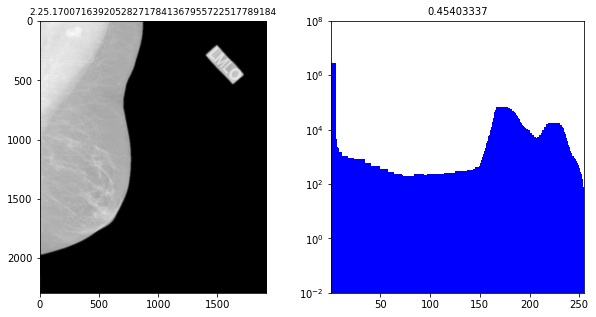

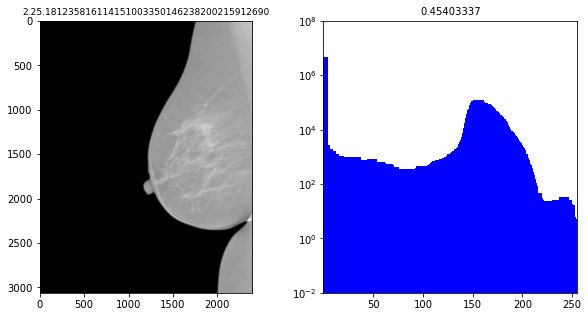

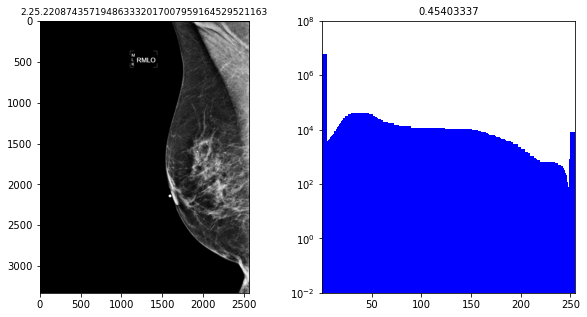

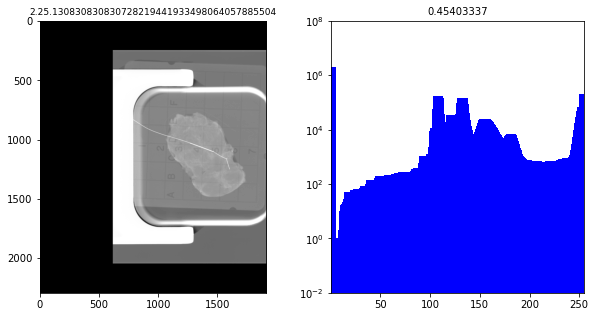

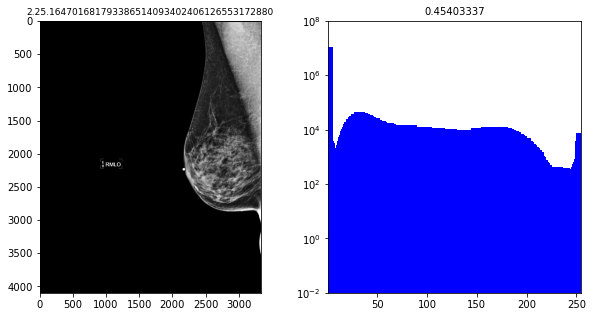

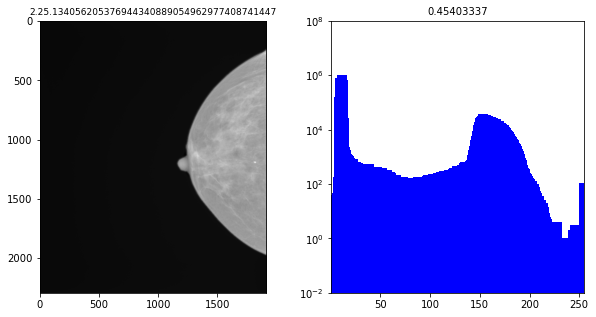

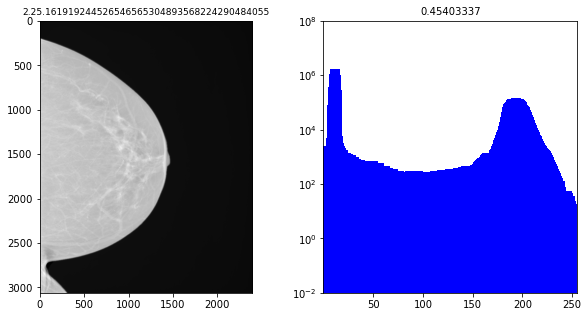

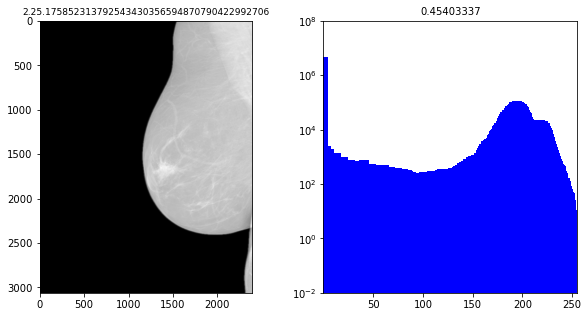

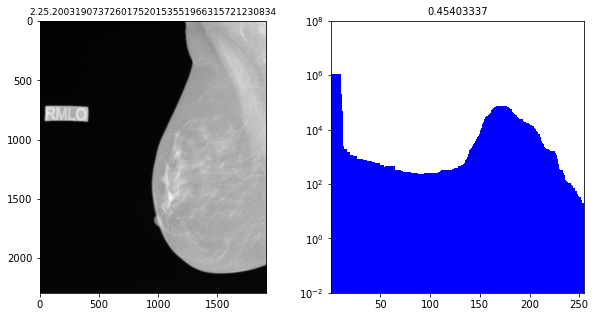

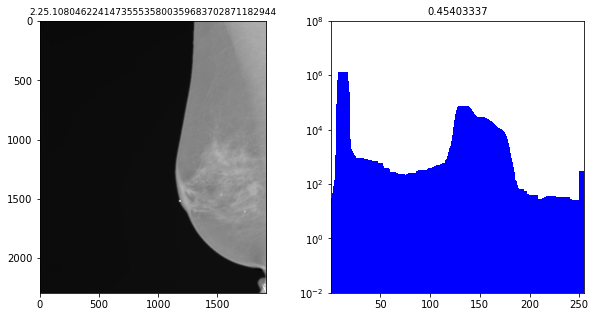

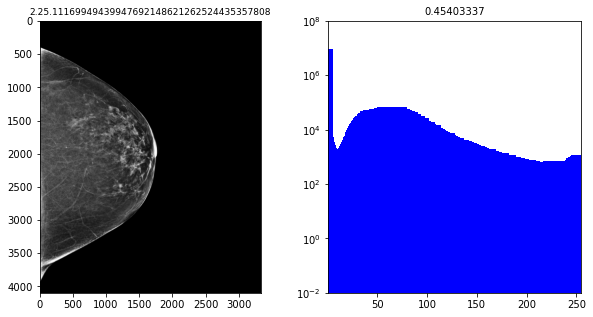

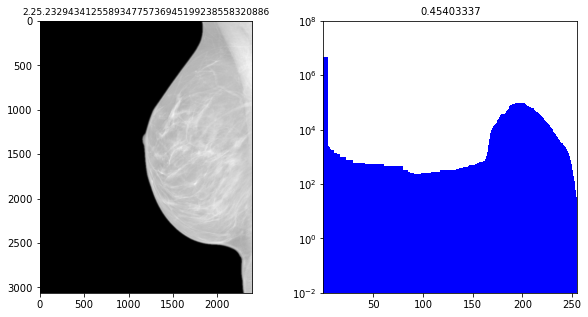

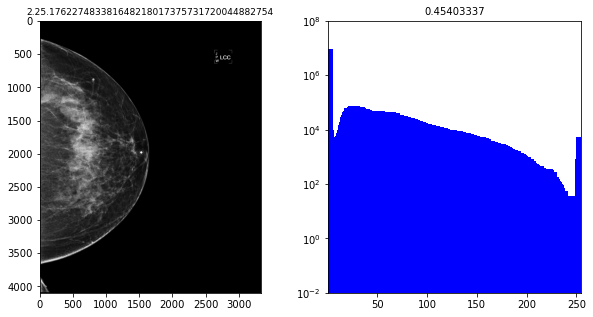

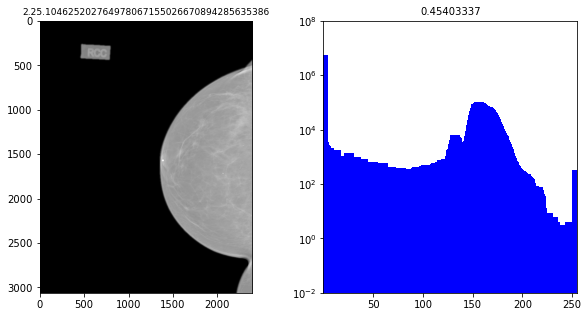

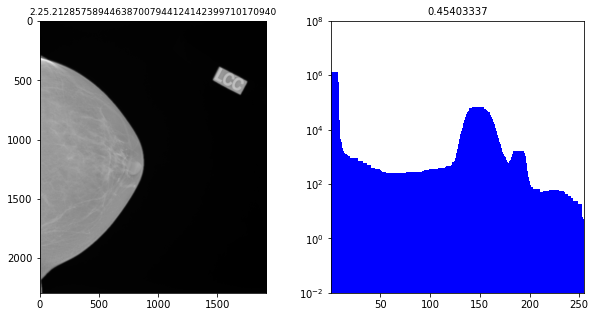

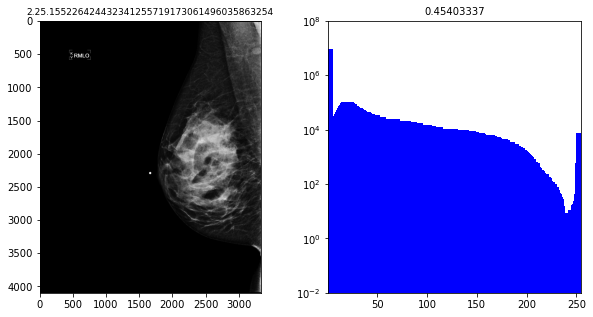

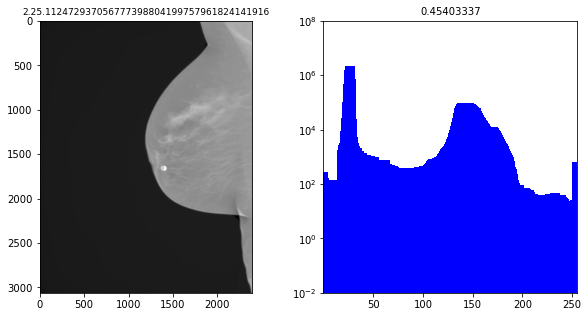

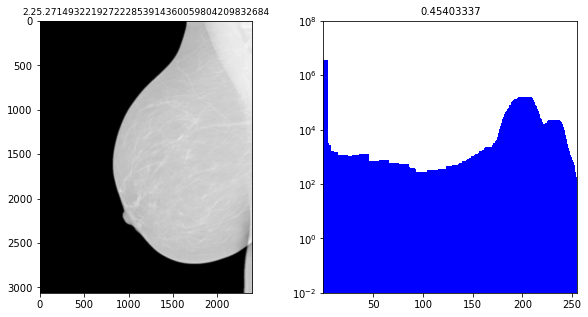

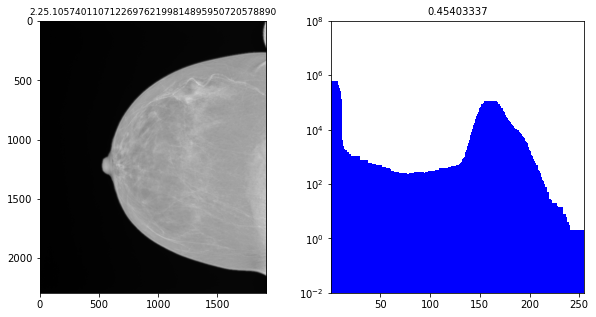

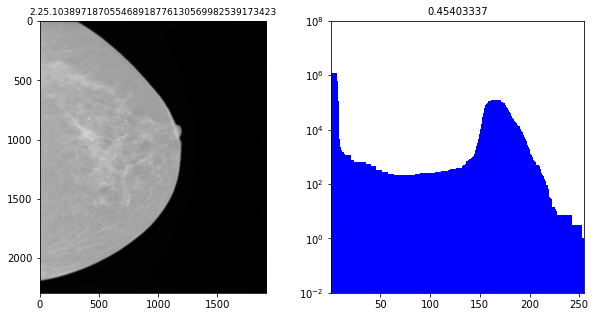

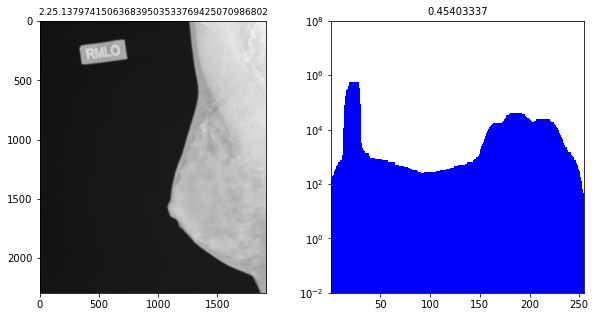

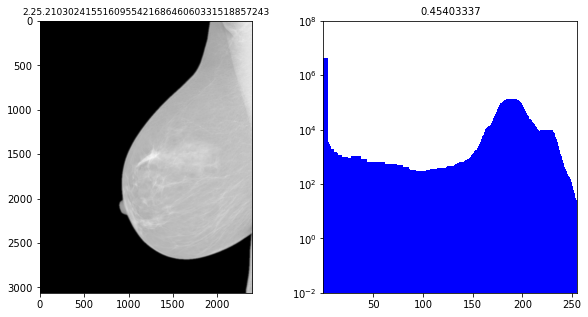

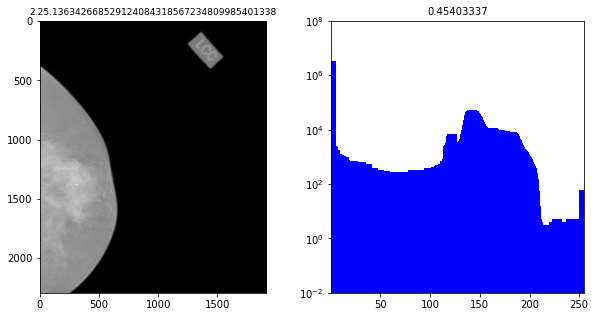

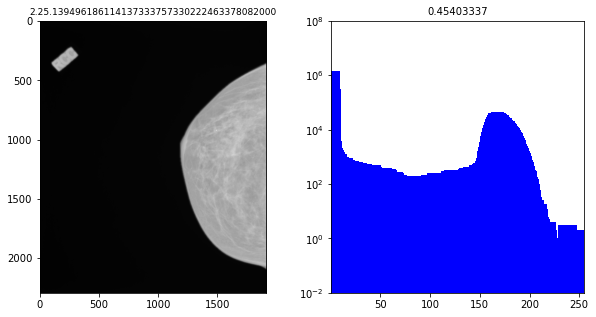

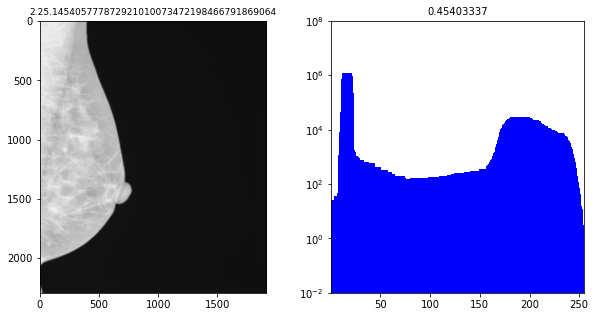

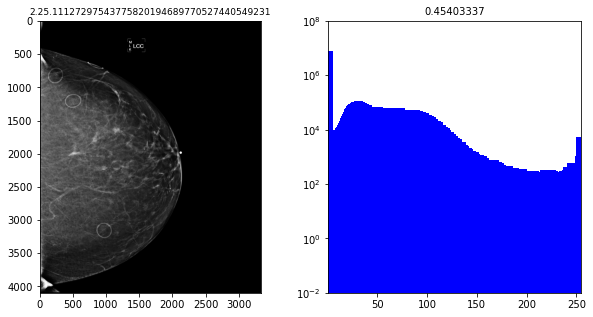

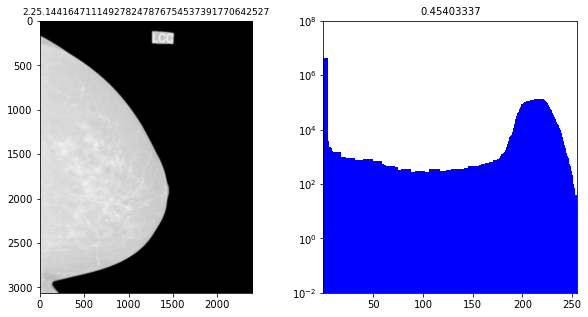

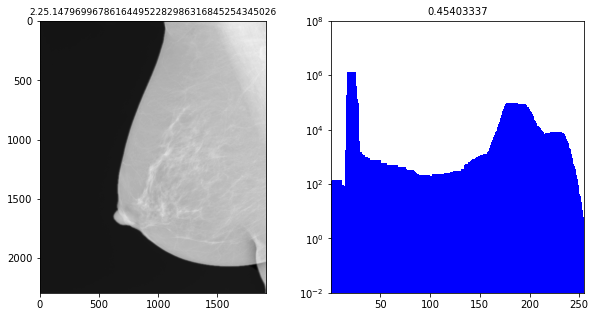

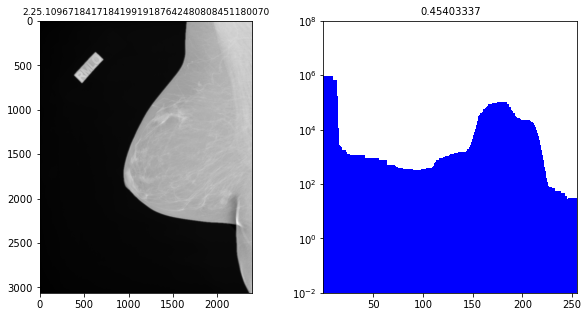

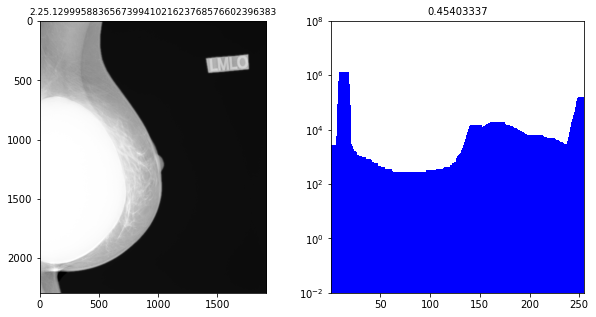

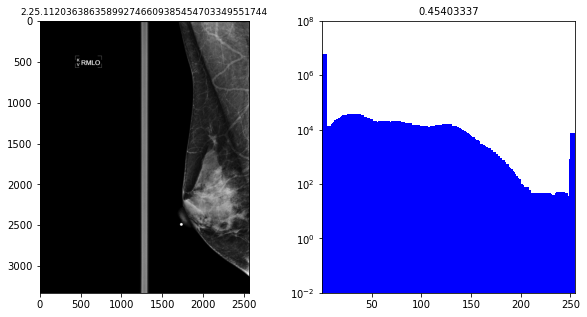

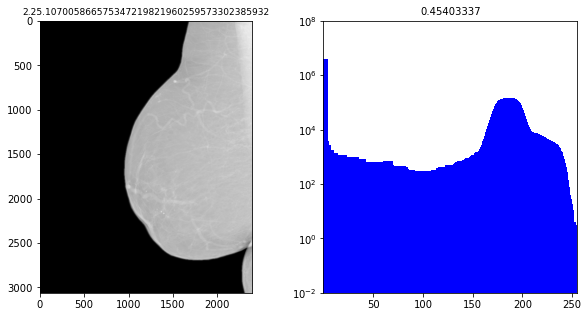

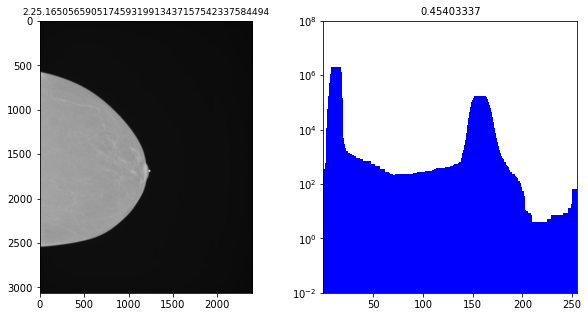

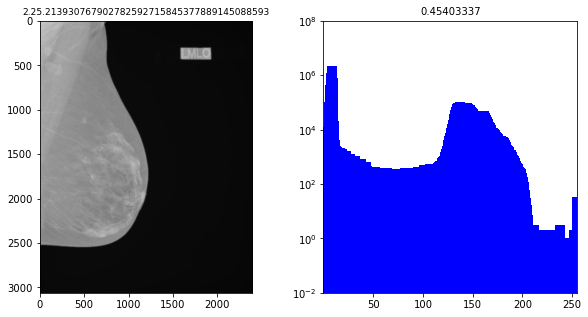

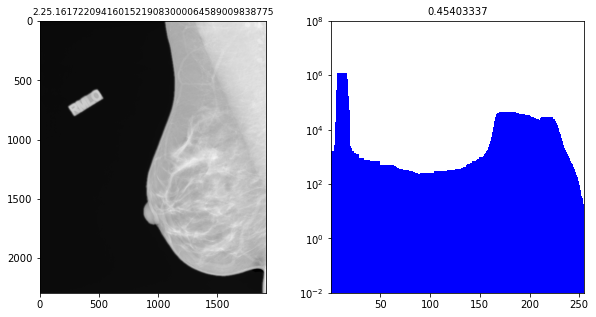

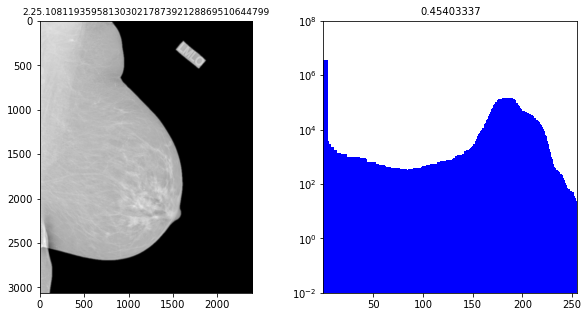

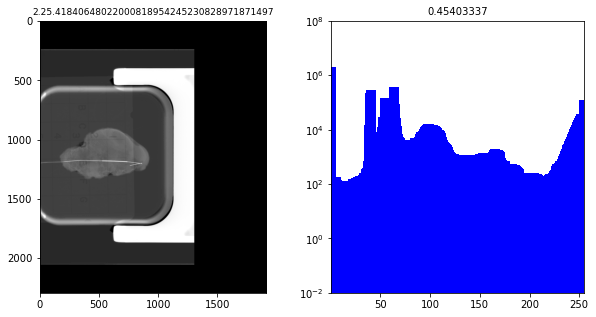

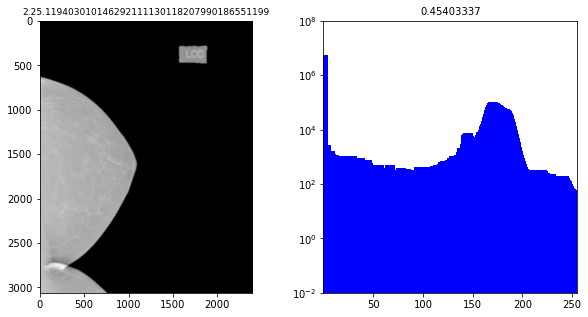

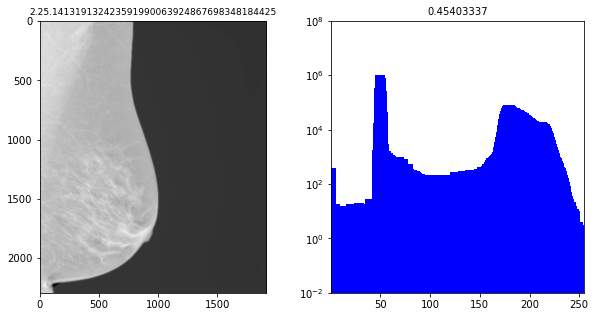

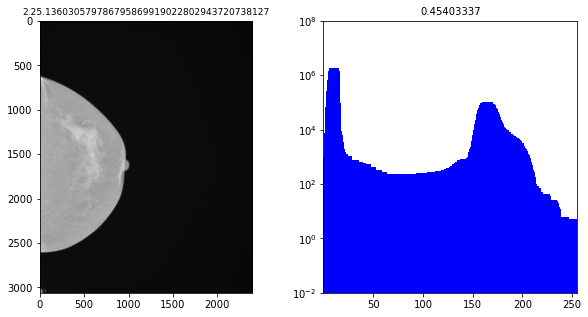

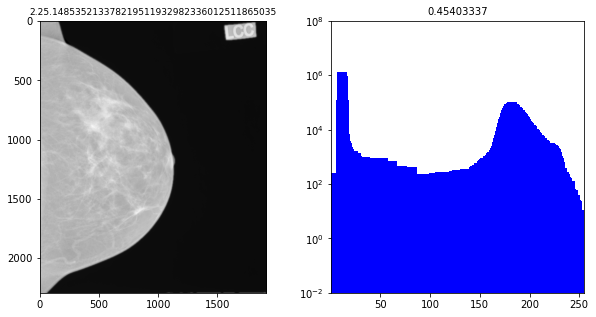

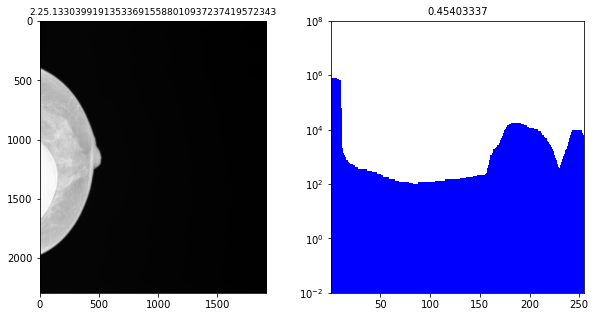

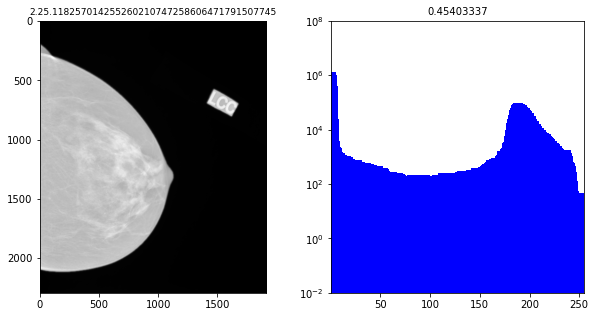

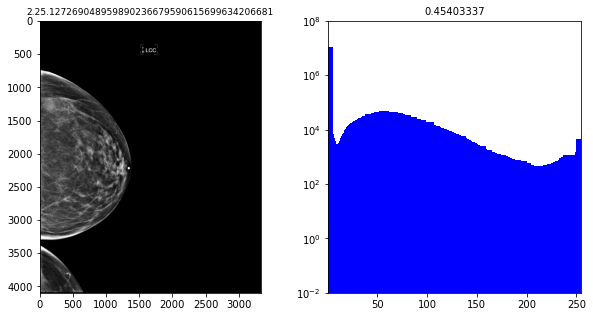

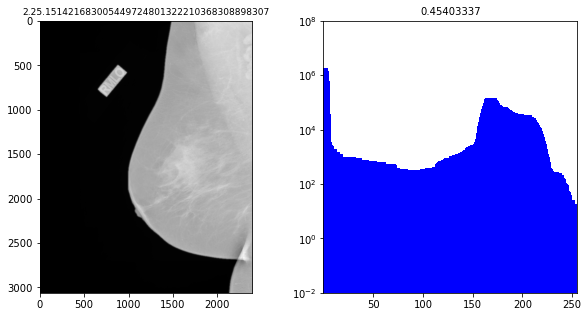

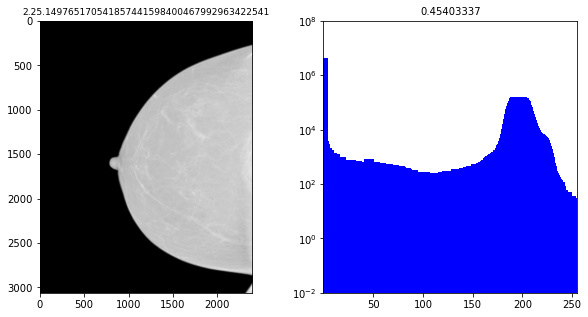

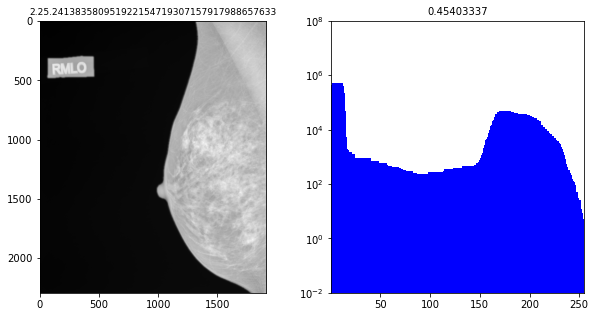

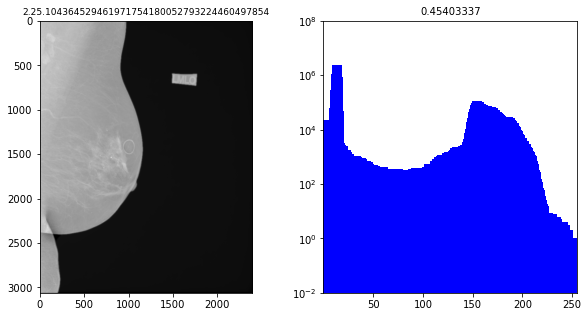

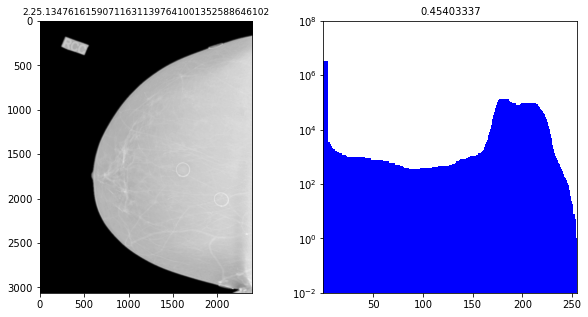

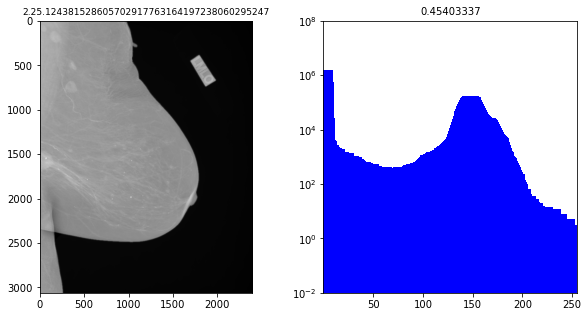

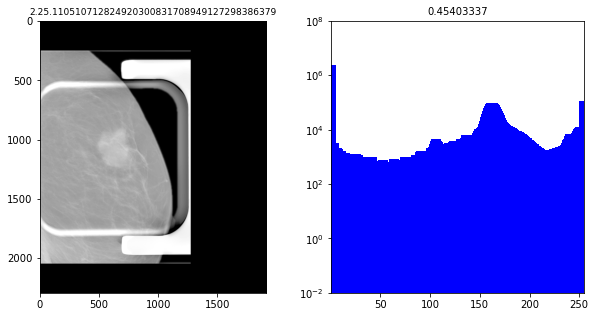

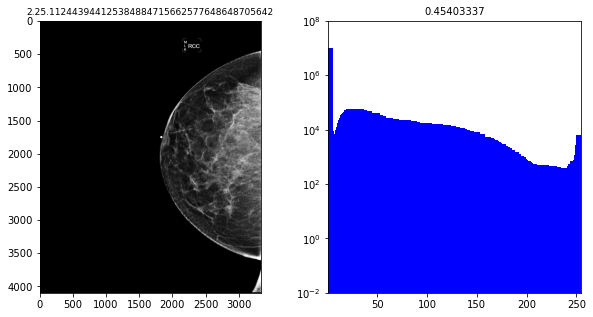

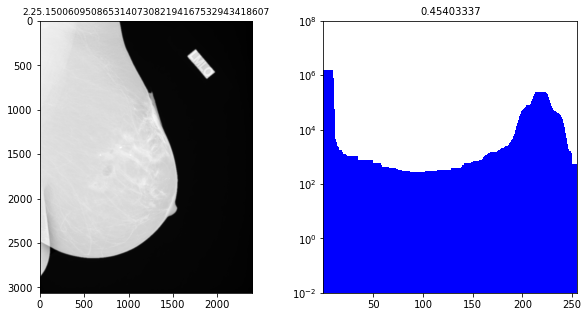

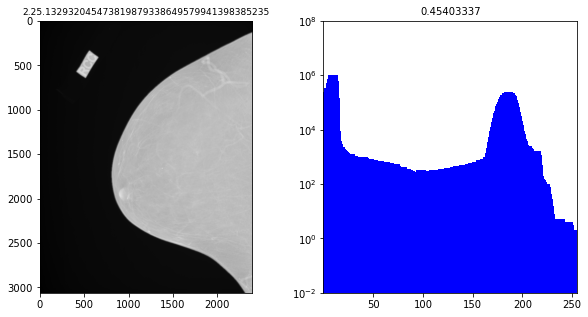

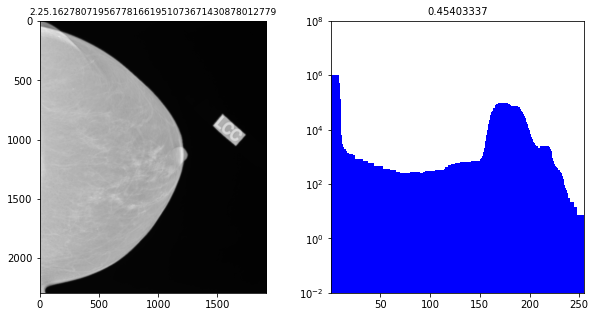

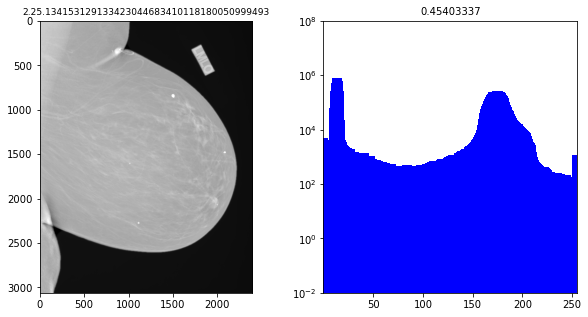

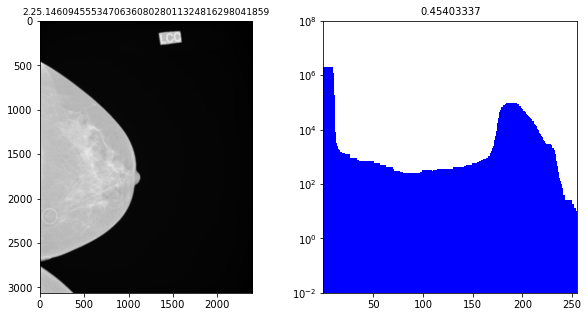

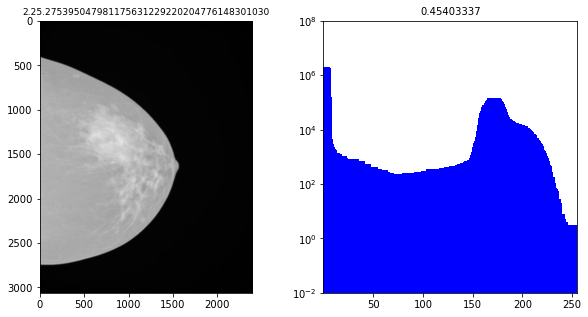

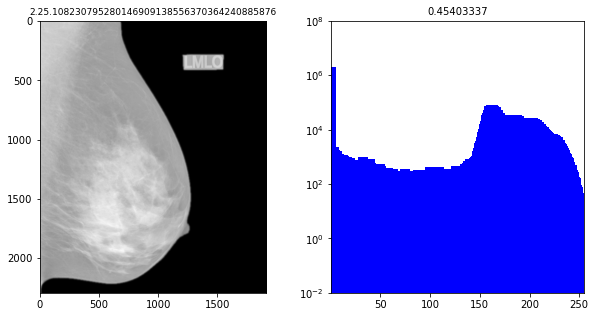

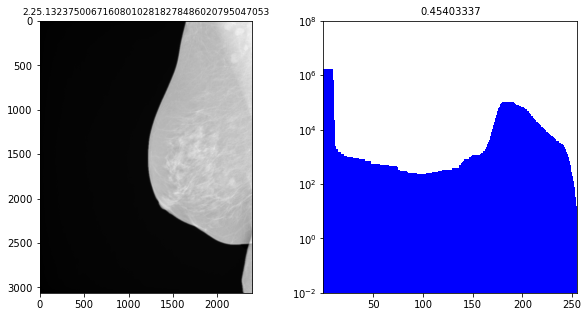

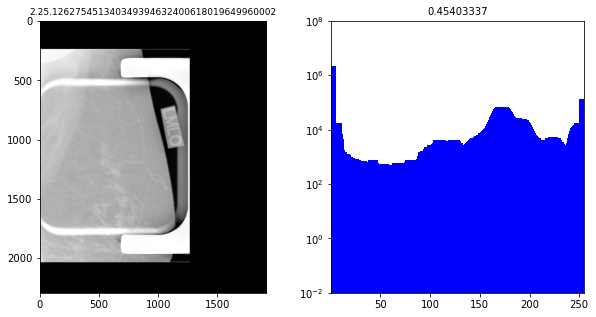

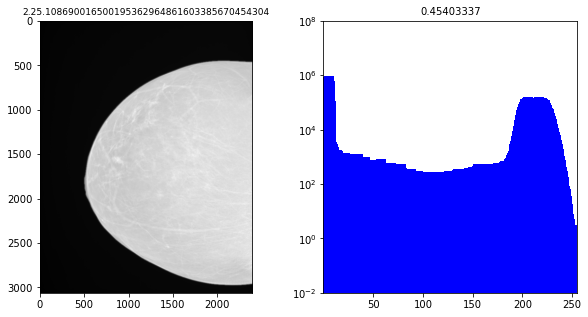

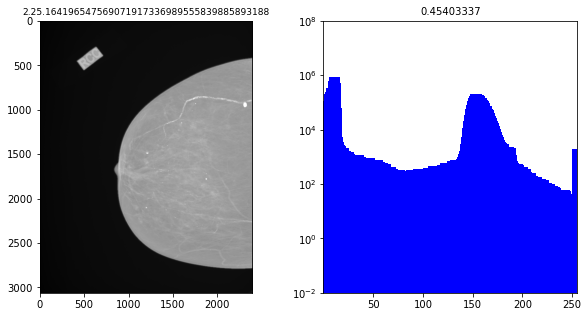

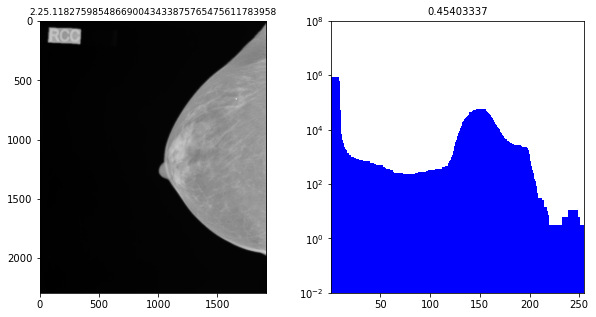

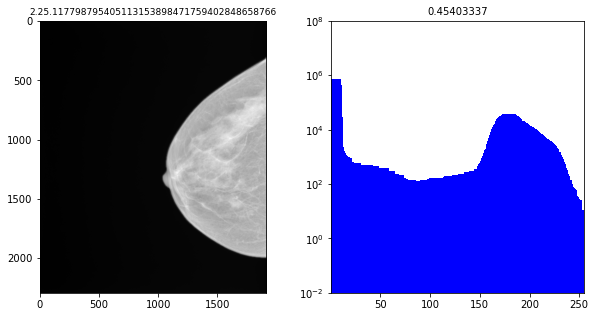

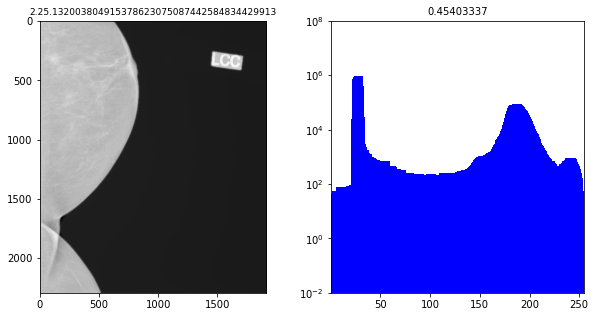

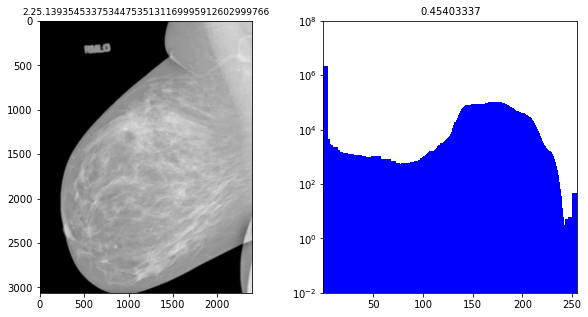

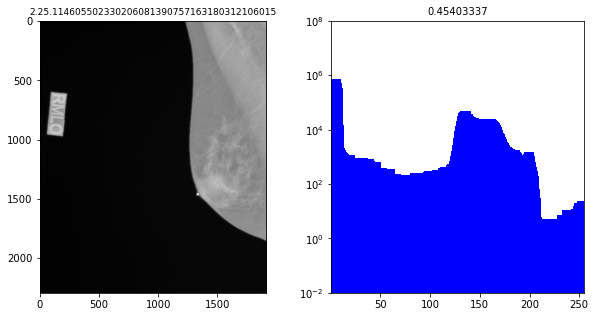

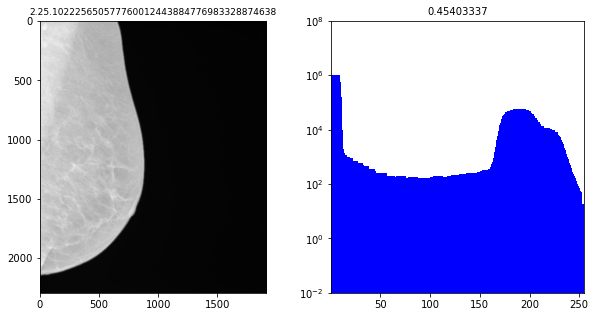

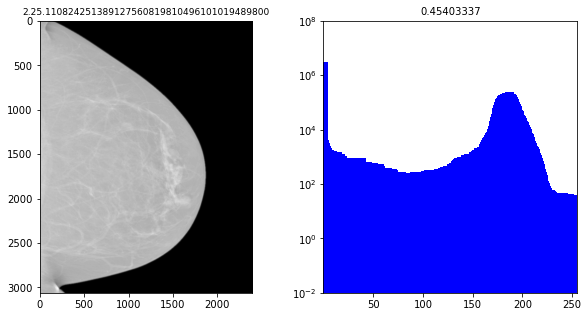

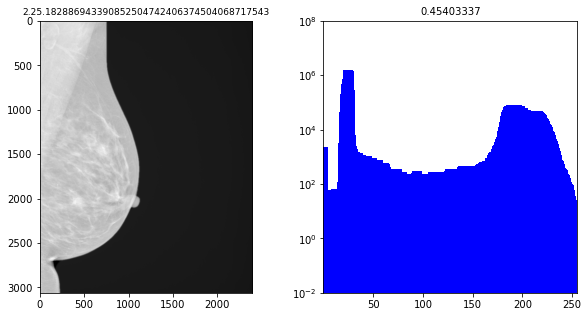

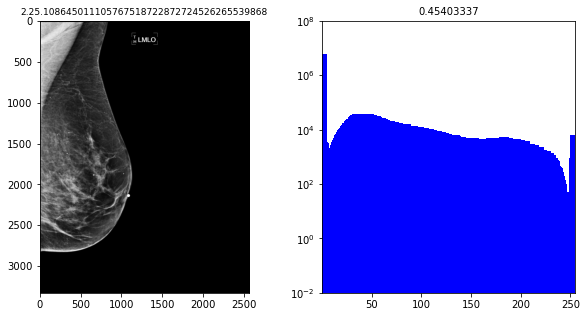

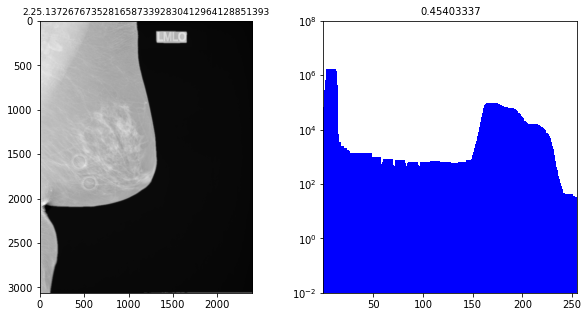

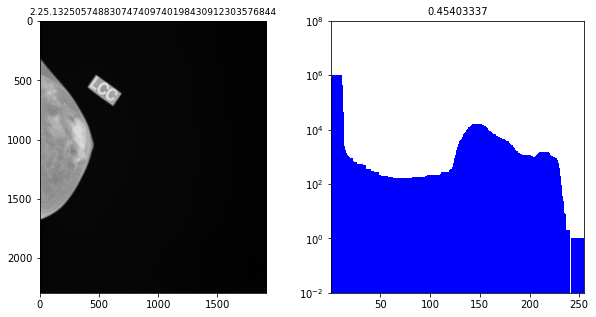

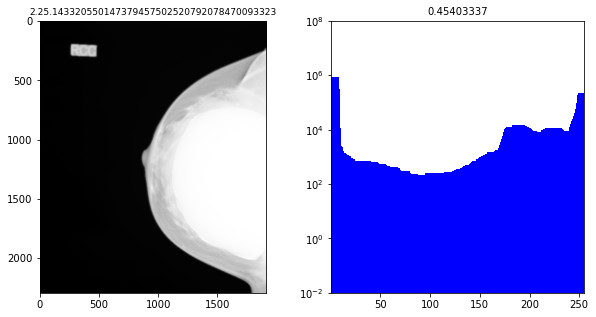

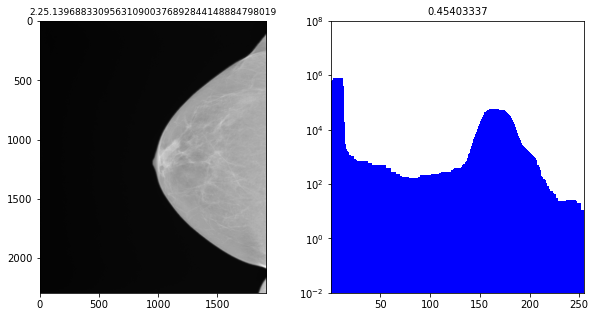

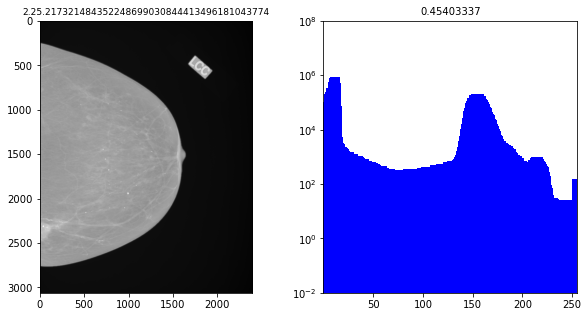

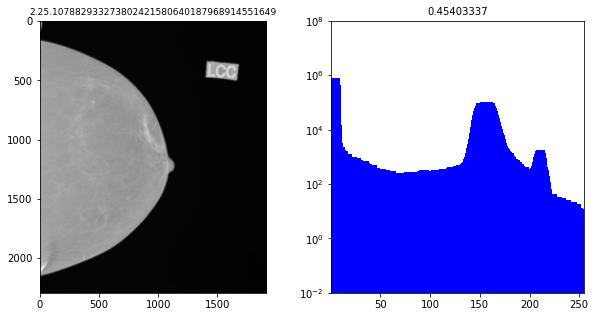

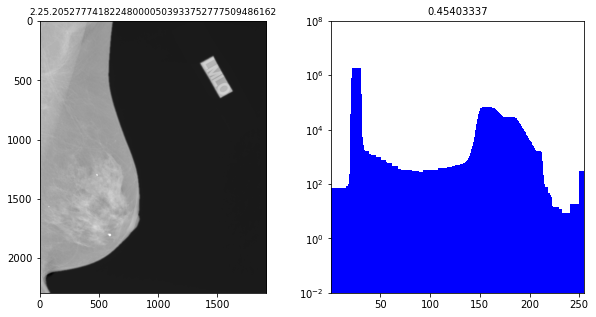

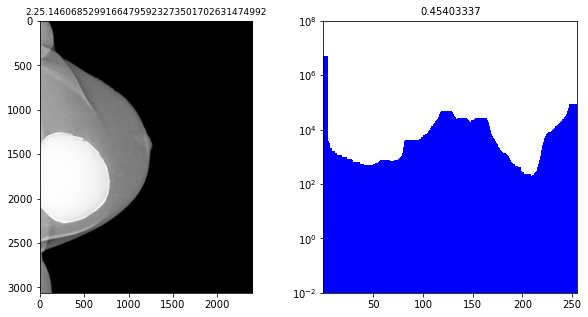

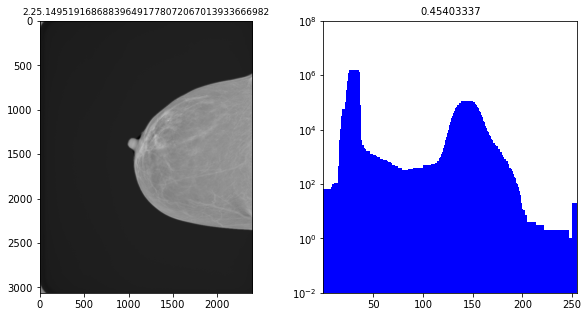

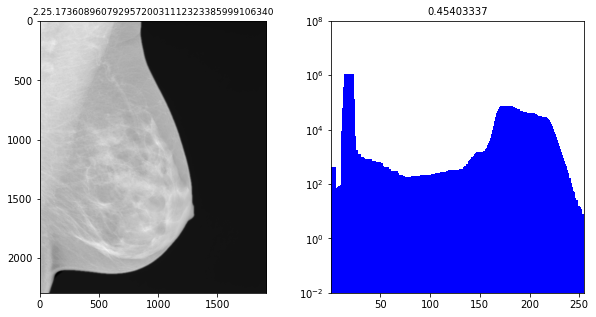

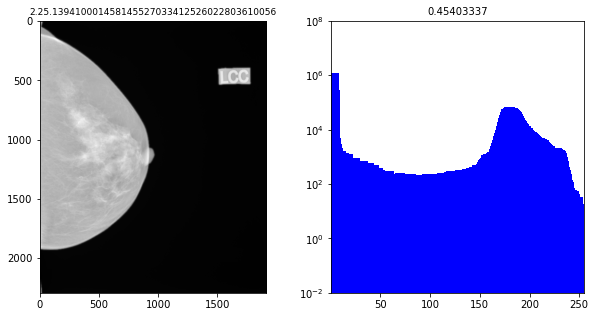

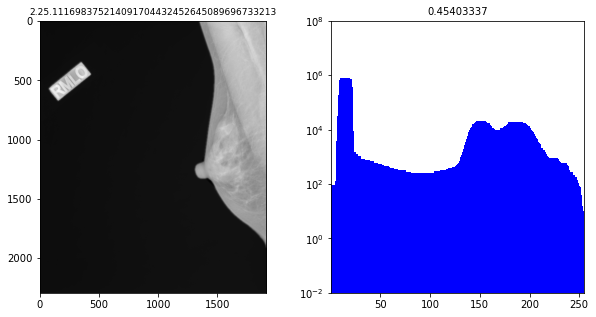

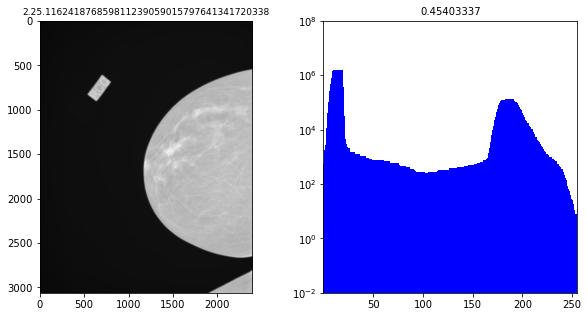

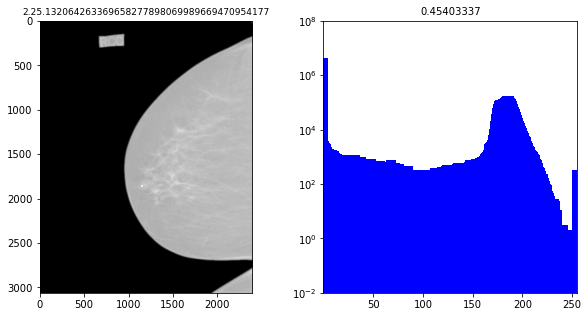

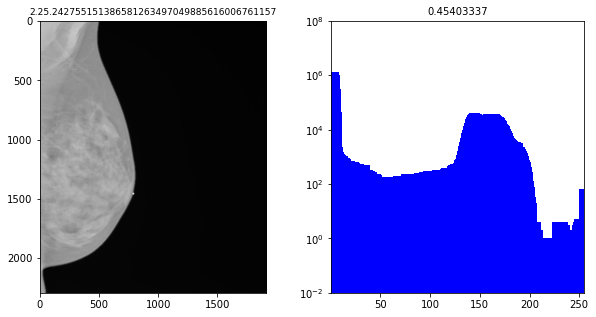

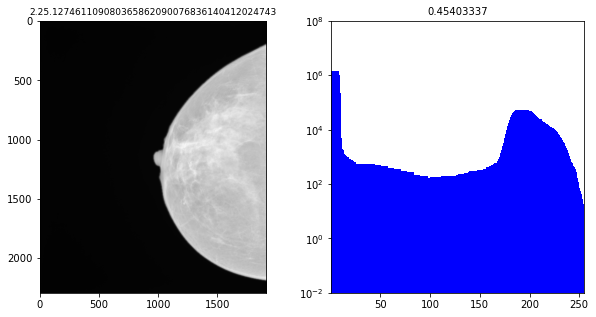

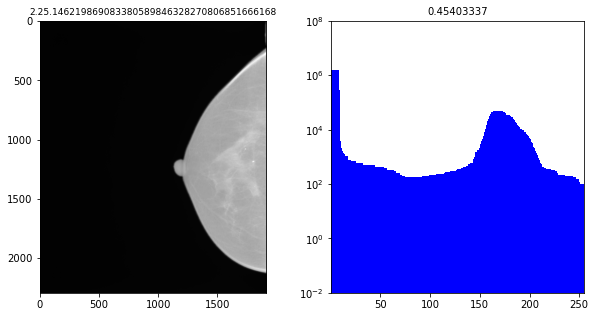

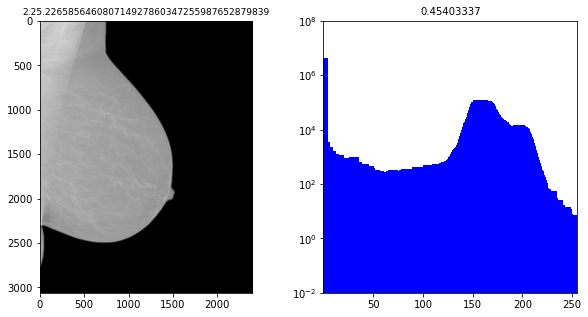

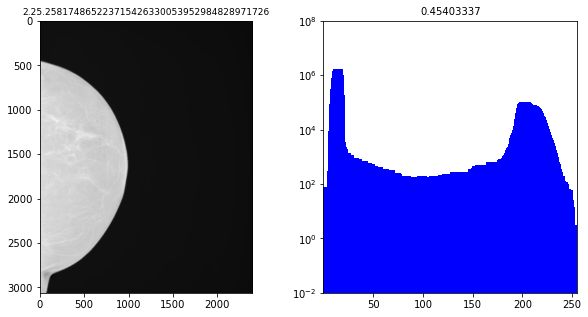

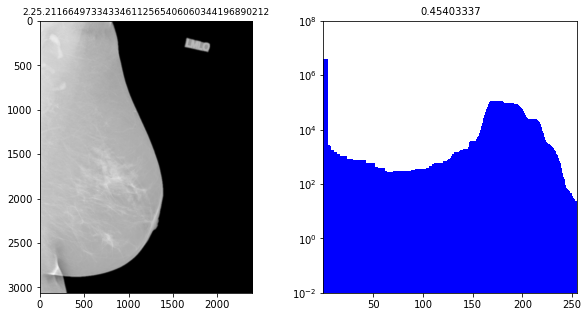

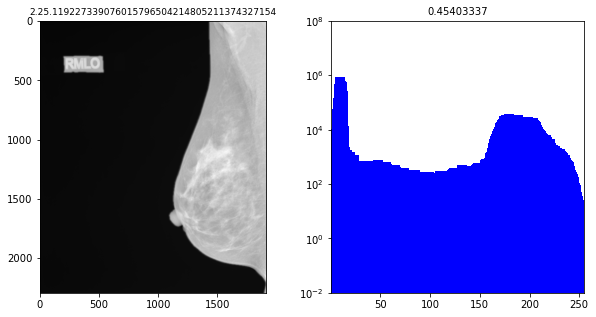

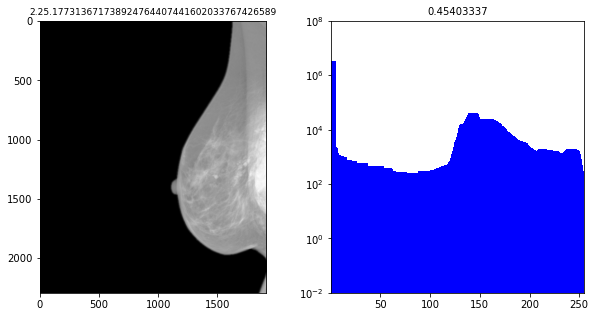

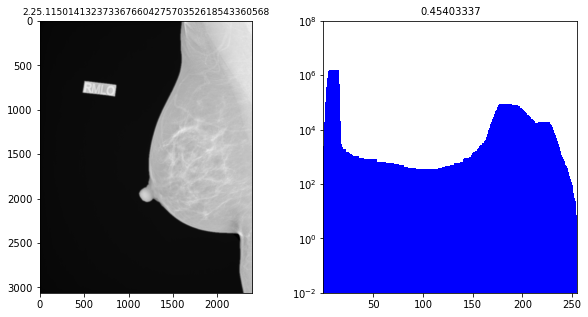

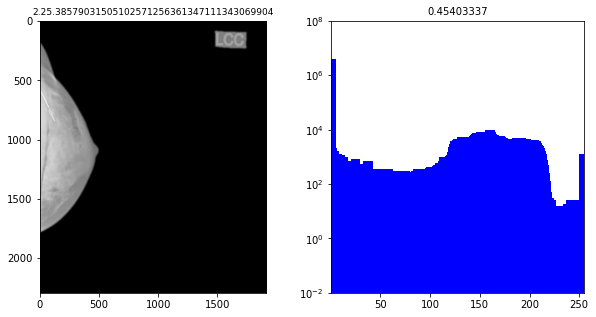

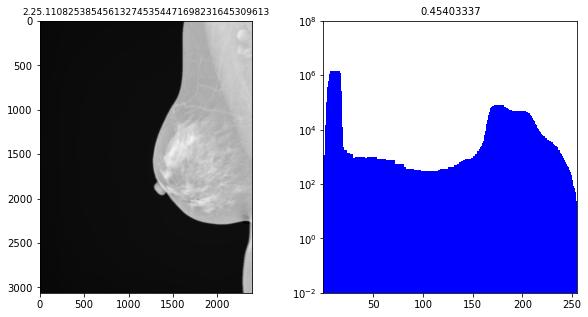

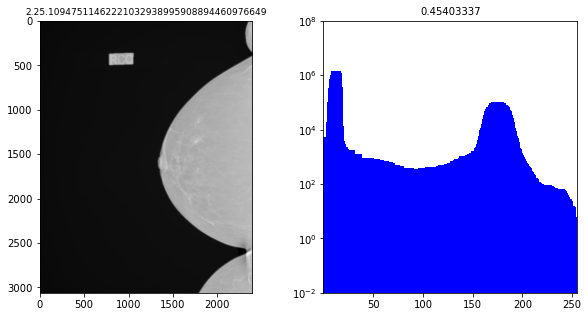

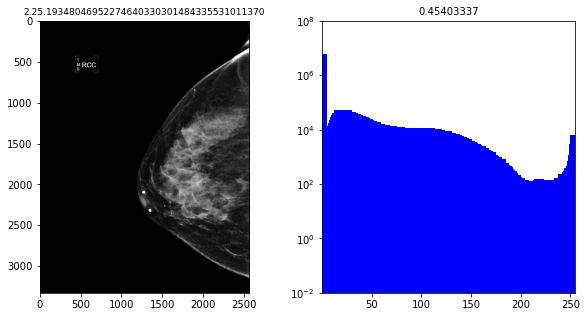

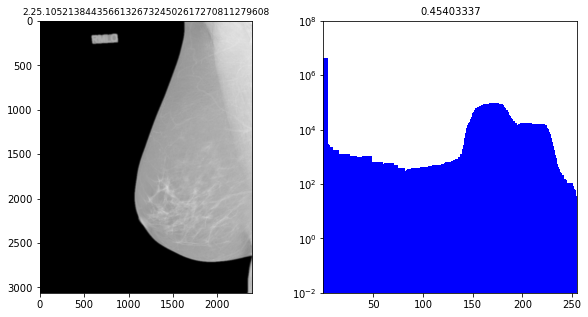

In [3]:
train_scoresX, train_labelsX = O.OutlierDetector.detect_outliers(histograms, pyod_algorithm='MOGAAL')
O.Features.view_image_and_features(imgs, ['hist'], train_scores=[train_scoresX])